In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tqdm import tqdm

In [55]:
data = np.load("data/traces_0.npz", allow_pickle=True)
print(data.files)
print(data['dut_io_computed_data'].dtype)
print(f"Shape of traces captured is {data['wave'].shape}")
print(f"Shape of ciphertext data is {data['dut_io_computed_data'].shape}")
print(f"Shape of plaintext data is {data['dut_io_data'].shape}")

['wave', 'dut_io_data', 'dut_io_computed_data']
object
Shape of traces captured is (10000, 200)
Shape of ciphertext data is (10000,)
Shape of plaintext data is (10000,)


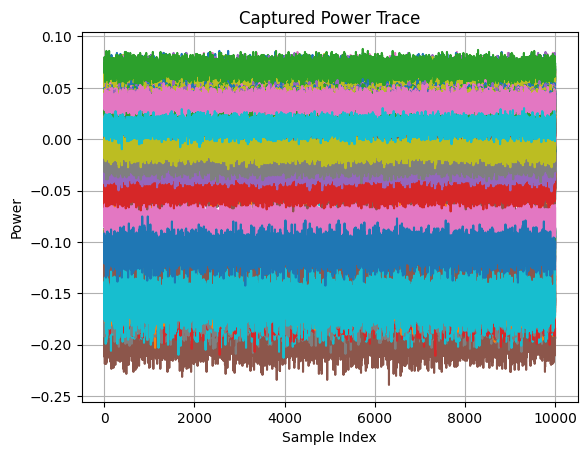

In [56]:
# Example: plot the waveform
waveform = data['wave']
plt.plot(waveform)
plt.title("Captured Power Trace")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.grid(True)
plt.show()

In [57]:
SAMPLE_RATE_HZ = 29_500_000  # based on extclk_x4 * 7.37 MHz
time_axis = np.arange(waveform.shape[1]) / SAMPLE_RATE_HZ * 1e6  # time in µs

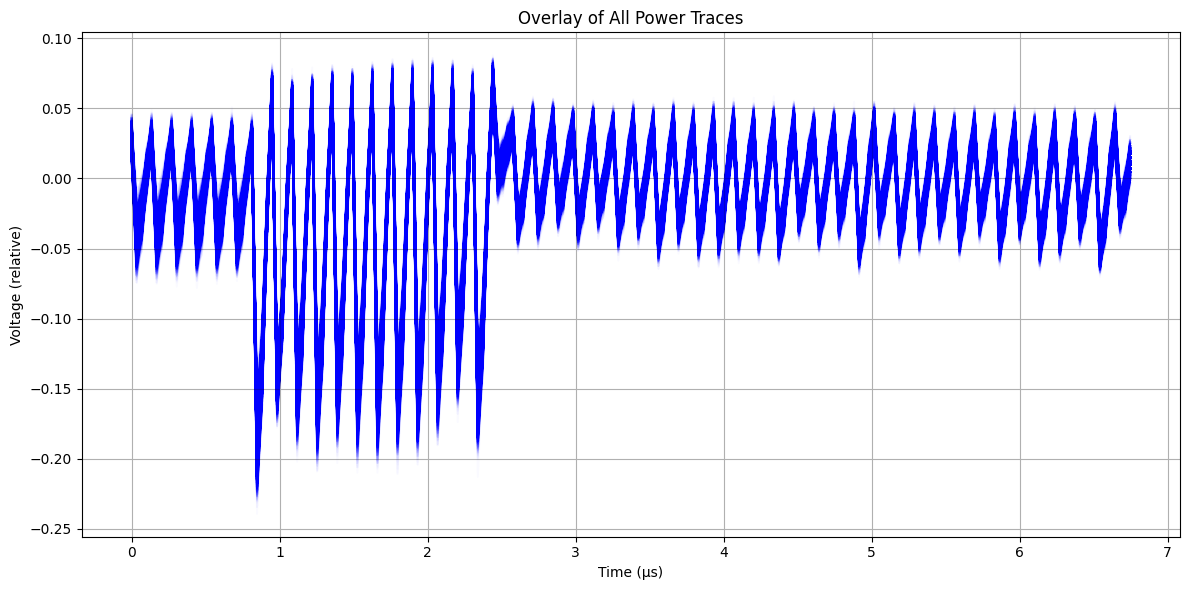

In [58]:
# === Plot all traces ===
plt.figure(figsize=(12, 6))
for trace in waveform:
    plt.plot(time_axis, trace, color='blue', alpha=0.02)  # alpha for transparency

plt.title("Overlay of All Power Traces")
plt.xlabel("Time (µs)")
plt.ylabel("Voltage (relative)")
plt.grid(True)
plt.tight_layout()
plt.show()

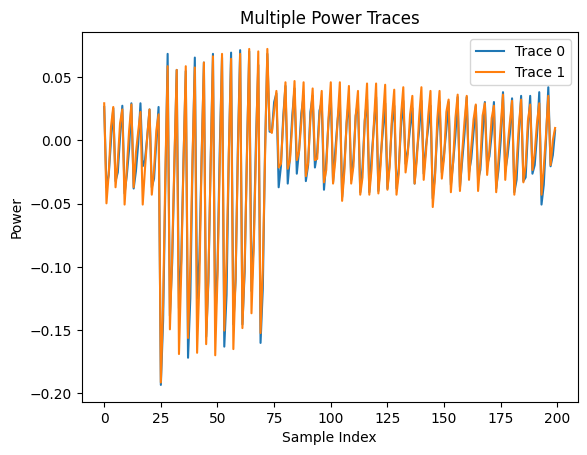

In [59]:
# multiple traces
for i in range(2):  # Plot first 2 traces
    plt.plot(data['wave'][i], label=f"Trace {i}")
plt.legend()
plt.title("Multiple Power Traces")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.show()

In [60]:
key_bytes = [
    0x10, 0xa5, 0x88, 0x69,
    0xd7, 0x4b, 0xe5, 0xa3,
    0x74, 0xcf, 0x86, 0x7c,
    0xfb, 0x47, 0x38, 0x59
]

Calculating SNR...
Global SNR: 60.6287


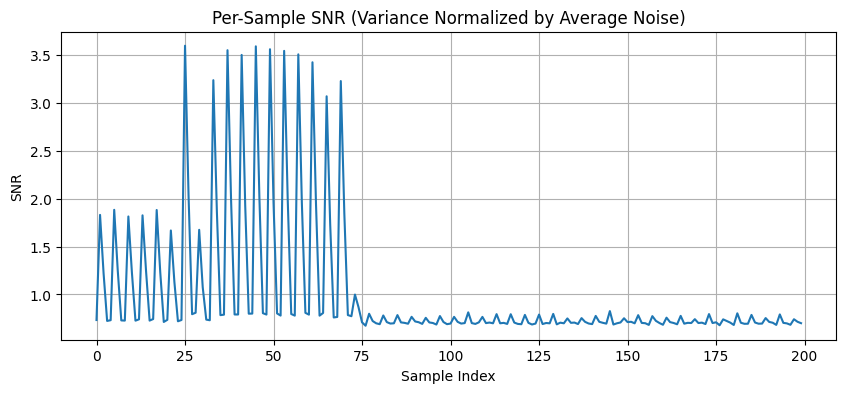


Performing DPA attack on byte 0...


DPA Progress: 100%|██████████| 256/256 [00:04<00:00, 53.15it/s]


DPA best key guess: 0x40 (max difference: 0.0009)


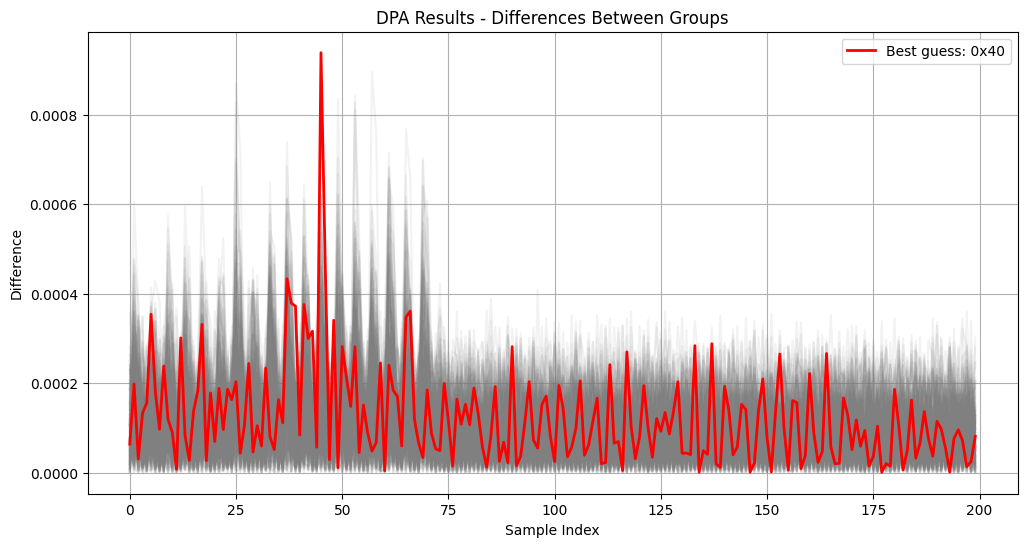


Performing optimized CPA attack on high-SNR regions...


Calculating correlations: 100%|██████████| 50/50 [00:03<00:00, 12.52it/s]


CPA best key guess: 0xdc (max correlation: 0.0395)


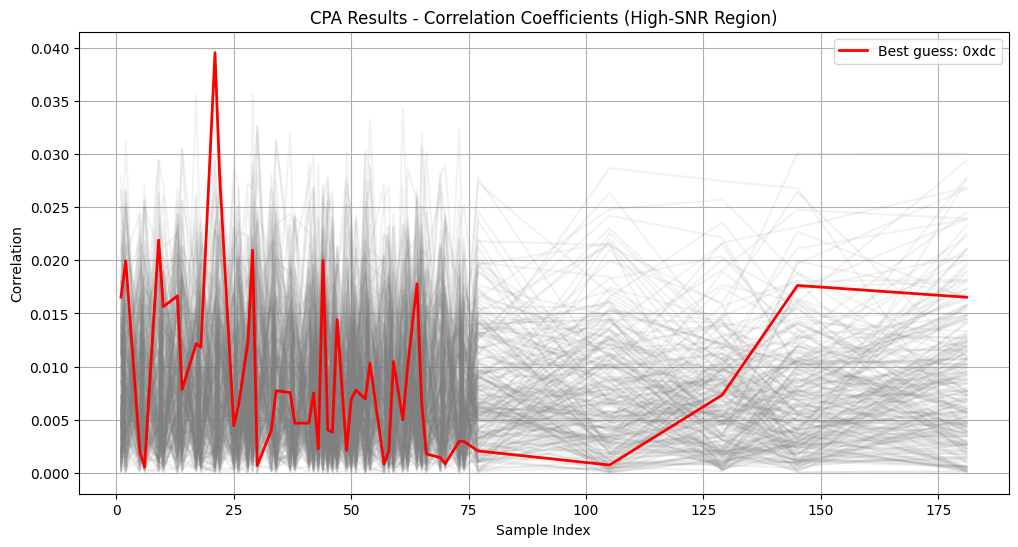

In [65]:
# AES S-box for intermediate value calculations
SBOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
], dtype=np.uint8)

class PowerAnalyzer:
    """
    Performs power analysis attacks on AES traces with optimizations for efficiency and accuracy.
    
    Attributes:
        traces (np.ndarray): Power traces (num_traces x trace_length)
        plaintexts (np.ndarray): Plaintext integers (num_traces)
        trace_length (int): Length of each power trace
        num_traces (int): Number of captured traces
    """
    
    def __init__(self, traces, plaintexts):
        """
        Initialize the power analyzer with captured data.
        
        Args:
            traces: Array of power traces (num_traces x trace_length)
            plaintexts: Array of plaintext integers (num_traces)
        """
        self.traces = traces
        self.plaintexts = plaintexts
        self.num_traces, self.trace_length = traces.shape
        
    def calculate_snr(self):
        """
        Calculate Signal-to-Noise Ratio (SNR) for each point in the trace.
        
        Corrected SNR calculation:
        - Signal: Variance of the mean trace
        - Noise: Mean of variances across traces
        
        This helps identify points in the trace with high data-dependent leakage.
        
        Returns:
            float: Global SNR value
            np.ndarray: SNR values per sample point
        """
        # Calculate mean and variance for each point across all traces
        mean_trace = np.mean(self.traces, axis=0)
        var_trace = np.var(self.traces, axis=0)
        
        # Signal: variance of the mean trace
        signal = np.var(mean_trace)
        # Noise: average variance across traces
        noise = np.mean(var_trace)
        
        # Per-sample SNR: variance at each point divided by average variance
        snr_per_sample = np.zeros(self.trace_length)
        if noise > 0:
            snr_per_sample = np.var(self.traces, axis=0) / noise
            
        return signal / noise, snr_per_sample
    
    def dpa_attack(self, target_byte=0, bit_index=7):
        """
        Perform Differential Power Analysis (DPA) attack on a specific byte.
        
        Args:
            target_byte: Which byte of the key to attack (0-15)
            bit_index: Which bit to use for partitioning (0-7, MSB=7)
            
        Returns:
            tuple: (best_key_guess, max_difference, differences)
        """
        differences = np.zeros((256, self.trace_length))
        
        # Extract target byte from each plaintext
        plaintext_bytes = np.array([(p >> (8*(15-target_byte))) & 0xFF for p in self.plaintexts])
        
        for kguess in tqdm(range(256), desc="DPA Progress"):
            # Calculate S-box outputs for all traces
            sbox_output = SBOX[plaintext_bytes ^ kguess]
            
            # Split traces based on selected bit
            bit_mask = 1 << bit_index
            group0 = self.traces[(sbox_output & bit_mask) == 0]
            group1 = self.traces[(sbox_output & bit_mask) != 0]
            
            # Calculate mean difference between groups
            mean0 = np.mean(group0, axis=0) if len(group0) > 0 else np.zeros(self.trace_length)
            mean1 = np.mean(group1, axis=0) if len(group1) > 0 else np.zeros(self.trace_length)
            differences[kguess] = np.abs(mean0 - mean1)
        
        # Find key guess with maximum difference at any point
        max_differences = np.max(differences, axis=1)
        best_key_guess = np.argmax(max_differences)
        max_difference = max_differences[best_key_guess]
        
        return best_key_guess, max_difference, differences
    
    def cpa_attack(self, target_byte=0, power_model='hw', sample_window=None):
        """
        Perform optimized Correlation Power Analysis (CPA) attack.
        
        Key optimizations:
        1. Vectorized intermediate value calculation
        2. Focus on high-SNR regions (sample_window)
        3. Efficient correlation computation
        
        Args:
            target_byte: Which byte of the key to attack (0-15)
            power_model: 'hw'=Hamming weight, 'bit'=single bit
            sample_window: Indices of samples to analyze (None for all)
            
        Returns:
            tuple: (best_key_guess, max_correlation, correlations)
        """
        # Default to all samples if no window specified
        if sample_window is None:
            sample_window = range(self.trace_length)
        n_samples = len(sample_window)
        
        # Precompute plaintext bytes once
        plaintext_bytes = np.array([(p >> (8*(15-target_byte))) & 0xFF for p in self.plaintexts])
        
        # Preallocate arrays
        correlations = np.zeros((256, n_samples))
        hypothetical_power = np.zeros((256, self.num_traces))
        
        # Precompute hypothetical power for all key guesses
        for kguess in range(256):
            sbox_output = SBOX[plaintext_bytes ^ kguess]
            if power_model == 'hw':
                # Hamming weight model (number of set bits)
                hypothetical_power[kguess] = np.array([bin(s).count('1') for s in sbox_output])
            elif power_model == 'bit':
                # Single bit model (MSB by default)
                hypothetical_power[kguess] = (sbox_output >> 7) & 0x01
            else:
                raise ValueError(f"Unknown power model: {power_model}")
        
        # Calculate correlations only for the sample window
        for j_idx, sample_idx in enumerate(tqdm(sample_window, desc="Calculating correlations")):
            trace_values = self.traces[:, sample_idx]
            
            # Vectorized correlation calculation
            mean_h = np.mean(hypothetical_power, axis=1)
            mean_t = np.mean(trace_values)
            
            # Covariance calculation
            cov = np.mean((hypothetical_power - mean_h[:, np.newaxis]) * 
                          (trace_values - mean_t), axis=1)
            
            # Standard deviations
            std_h = np.std(hypothetical_power, axis=1)
            std_t = np.std(trace_values)
            
            # Avoid division by zero
            with np.errstate(divide='ignore', invalid='ignore'):
                corr = cov / (std_h * std_t)
                corr[std_h == 0] = 0
            
            correlations[:, j_idx] = np.abs(corr)
        
        # Find key guess with maximum correlation at any point
        max_correlations = np.max(correlations, axis=1)
        best_key_guess = np.argmax(max_correlations)
        max_correlation = max_correlations[best_key_guess]
        
        return best_key_guess, max_correlation, correlations, sample_window
    
    def plot_results(self, data, title, best_key, ylabel, sample_indices=None):
        """
        Plot attack results showing all key guesses and highlighting the best candidate.
        
        Args:
            data: 2D array of results (key guesses x trace points)
            title: Plot title
            best_key: The best key candidate to highlight
            ylabel: Y-axis label
            sample_indices: Specific sample indices to plot (None for all)
        """
        plt.figure(figsize=(12, 6))
        
        # Use provided sample indices or default to all
        x_indices = sample_indices if sample_indices is not None else range(data.shape[1])
        
        # Plot all key guesses in gray
        for kguess in range(256):
            plt.plot(x_indices, data[kguess], alpha=0.1, color='gray')
        
        # Highlight the best key guess in red
        plt.plot(x_indices, data[best_key], color='red', linewidth=2, 
                 label=f'Best guess: 0x{best_key:02x}')
        
        plt.title(title)
        plt.xlabel("Sample Index")
        plt.ylabel(ylabel)
        plt.legend()
        plt.grid(True)
        plt.show()

def analyze_captured_data(traces, plaintexts, true_key=None):
    """
    Perform comprehensive power analysis on captured traces.
    
    Args:
        traces: Captured power traces
        plaintexts: Corresponding plaintext inputs
        true_key: Known key for verification (optional)
    """
    analyzer = PowerAnalyzer(traces, plaintexts)
    
    # 1. Calculate and plot SNR
    print("Calculating SNR...")
    global_snr, snr_per_sample = analyzer.calculate_snr()
    print(f"Global SNR: {global_snr:.4f}")
    
    # Plot SNR per sample
    plt.figure(figsize=(10, 4))
    plt.plot(snr_per_sample)
    plt.title("Per-Sample SNR (Variance Normalized by Average Noise)")
    plt.xlabel("Sample Index")
    plt.ylabel("SNR")
    plt.grid(True)
    plt.show()
    
    # Find high-SNR regions (top 2% of samples)
    num_high_snr = max(50, int(0.02 * analyzer.trace_length))
    high_snr_indices = np.argsort(snr_per_sample)[-num_high_snr:]
    high_snr_indices.sort()  # Keep in ascending order
    
    # 2. Perform DPA attack on first byte
    print("\nPerforming DPA attack on byte 0...")
    best_key_dpa, max_diff, differences = analyzer.dpa_attack(target_byte=0)
    print(f"DPA best key guess: 0x{best_key_dpa:02x} (max difference: {max_diff:.4f})")
    analyzer.plot_results(differences, "DPA Results - Differences Between Groups", 
                         best_key_dpa, "Difference")
    
    # 3. Perform optimized CPA attack on high-SNR regions
    print("\nPerforming optimized CPA attack on high-SNR regions...")
    best_key_cpa, max_corr, correlations, sample_window = analyzer.cpa_attack(
        target_byte=0, 
        sample_window=high_snr_indices
    )
    print(f"CPA best key guess: 0x{best_key_cpa:02x} (max correlation: {max_corr:.4f})")
    analyzer.plot_results(correlations, "CPA Results - Correlation Coefficients (High-SNR Region)", 
                         best_key_cpa, "Correlation", sample_indices=sample_window)
    
    # 4. Verify against known key if available
    if true_key is not None:
        # Extract first byte of true key
        true_first_byte = (true_key >> (8 * 15)) & 0xFF
        
        print("\nVerification against known key:")
        print(f"True first key byte: 0x{true_first_byte:02x}")
        print(f"DPA recovered byte: 0x{best_key_dpa:02x}")
        print(f"CPA recovered byte: 0x{best_key_cpa:02x}")
        
        if best_key_cpa == true_first_byte:
            print("CPA successfully recovered the correct key byte!")
        elif best_key_dpa == true_first_byte:
            print("DPA successfully recovered the correct key byte!")
        else:
            print("Neither attack recovered the correct key byte")
    
    # 5. Attack all key bytes with CPA
    if true_key is not None:
        print("\nAttacking all 16 key bytes with CPA...")
        recovered_key = 0
        for byte_index in range(16):
            best_byte, _, _, _ = analyzer.cpa_attack(
                target_byte=byte_index,
                sample_window=high_snr_indices
            )
            recovered_key = (recovered_key << 8) | best_byte
            true_byte = (true_key >> (8*(15-byte_index))) & 0xFF
            print(f"Byte {byte_index}: Recovered 0x{best_byte:02x}, True 0x{true_byte:02x} - {'MATCH' if best_byte == true_byte else 'MISMATCH'}")
        
        print(f"\nFull recovered key: 0x{recovered_key:032x}")
        print(f"True key:        0x{true_key:032x}")

if __name__ == "__main__":
    traces = waveform # shape (10000, 200)
    plaintexts = data['dut_io_data'] # shape (10000,)

    # Perform power analysis
    analyze_captured_data(traces, plaintexts)